In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TASK 1

Class Distribution in Training Set:
acai: 15
cupuacu: 15
graviola: 15
guarana: 15
pupunha: 15
tucuma: 15
Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 13s/step - accuracy: 0.1478 - loss: 2.5918 - learning_rate: 1.0000e-04
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3573 - loss: 1.8399 - learning_rate: 1.0000e-04
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.4975 - loss: 1.2919 - learning_rate: 1.0000e-04
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5066 - loss: 1.3294 - learning_rate: 1.0000e-04
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.6419 - loss: 1.0367 - learning_rate: 1.0000e-04
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.5901 - loss: 1.1312 - learning_rate: 1.0000e-04
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 7s/step - accuracy: 0.7279 - loss: 0.7807 - learning_rate: 1.0000e-04
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.7271 - loss: 0.7746 - learning_rate: 1.0000e-04
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.7789 - loss: 0.6666 - learning_rate: 1.0000e-04


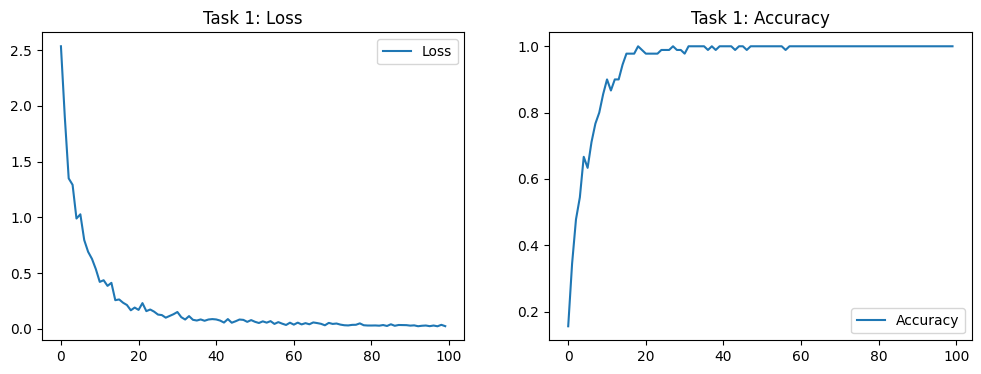

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.1667 - loss: 3.3410
Task 1 Test Accuracy: 0.1667, Loss: 3.3410
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report (Task 1):
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         5
     cupuacu       0.17      1.00      0.29         5
    graviola       0.00      0.00      0.00         5
     guarana       0.00      0.00      0.00         5
     pupunha       0.00      0.00      0.00         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.17        30
   macro avg       0.03      0.17      0.05        30
weighted avg       0.03      0.17      0.05        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Constants
img_height, img_width = 224, 224
batch_size = 32
train_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning./week5/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning./week5/FruitinAmazon/test"

# Class names check
class_names = sorted(os.listdir(train_dir))
print("Class Distribution in Training Set:")
for class_name in class_names:
    print(f"{class_name}: {len(os.listdir(os.path.join(train_dir, class_name)))}")

# Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.5),
    layers.RandomContrast(0.5),
    layers.RandomBrightness(0.5)
])

# Datasets
train_ds = keras.utils.image_dataset_from_directory(
    train_dir, seed=123, image_size=(img_height, img_width), batch_size=batch_size
).map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)\
 .cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

test_ds = keras.utils.image_dataset_from_directory(
    test_dir, image_size=(img_height, img_width), batch_size=batch_size, shuffle=False
).cache().prefetch(tf.data.AUTOTUNE)

# Enhanced CNN model with BN & Dropout
model = Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),

    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')
])

# Compile & train
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=100,
                    callbacks=[
                        keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True, monitor='loss'),
                        keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=10, min_lr=1e-6)
                    ])

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Task 1: Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Task 1: Accuracy')
plt.legend()
plt.show()

# Evaluate Task 1
test_loss, test_acc = model.evaluate(test_ds)
print(f"Task 1 Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

# Classification Report
y_true, y_pred = [], []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(model.predict(images), axis=1))
print("Classification Report (Task 1):")
print(classification_report(y_true, y_pred, target_names=class_names))


TASK 2

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 109s 38s/step - accuracy: 0.1661 - loss: 2.1160 - learning_rate: 5.0000e-05
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 142s 34s/step - accuracy: 0.1403 - loss: 2.1942 - learning_rate: 5.0000e-05
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 143s 35s/step - accuracy: 0.2561 - loss: 1.9084 - learning_rate: 5.0000e-05
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 112s 34s/step - accuracy: 0.3252 - loss: 1.6870 - learning_rate: 5.0000e-05
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 135s 33s/step - accuracy: 0.2112 - loss: 1.8981 - learning_rate: 5.0000e-05
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 104s 37s/step - accuracy: 0.3043 - loss: 1.6790 - learning_rate: 5.0000e-05
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 144s 33s/step - accuracy: 0.3312 - loss: 1.6425 - learning_rate: 5.0000e-05
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 142s 38s/step - accuracy: 0.4009 - loss: 1.4702 - learning_rate: 5.0000e-05
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 103s 34s/step - accuracy: 0.4365 - loss: 1.3282 - learning_rate: 5.0000e-05
Epo

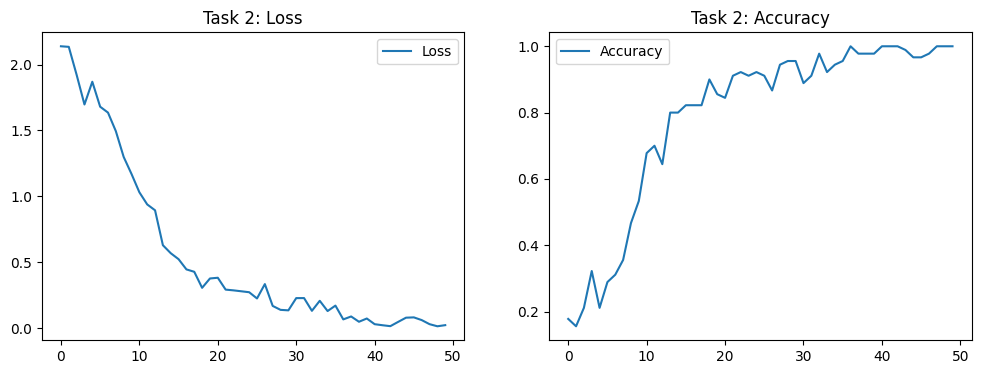

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.7000 - loss: 1.4529
Task 2 Test Accuracy: 0.7000, Loss: 1.4529
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
Classification Report (Task 2):
              precision    recall  f1-score   support

        acai       0.80      0.80      0.80         5
     cupuacu       0.57      0.80      0.67         5
    graviola       0.71      1.00      0.83         5
     guarana       0.67      0.80      0.73         5
     pupunha       1.00      0.40      0.57         5
      tucuma       0.67      0.40      0.50         5

    accuracy                           0.70        30
   macro avg       0.74      0.70      0.68        30
weighted avg       0.74      0.70      0.68        30

 Performance Comparison:
Task 1 CNN       - Accuracy: 0.1667
Task 2 VGG16     - Accuracy: 0.7000


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all, unfreeze last 8
for layer in base_model.layers[:-8]:
    layer.trainable = False
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Build the full model
model_vgg = Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.7),
    Dense(6, activation='softmax')
])

model_vgg.compile(optimizer=Adam(learning_rate=0.00005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_vgg = model_vgg.fit(train_ds, epochs=50,
                            callbacks=[
                                keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='loss'),
                                keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)
                            ])

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Loss')
plt.title('Task 2: Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Accuracy')
plt.title('Task 2: Accuracy')
plt.legend()
plt.show()

# Evaluate
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(test_ds)
print(f"Task 2 Test Accuracy: {test_acc_vgg:.4f}, Loss: {test_loss_vgg:.4f}")

# Classification Report
y_true_vgg, y_pred_vgg = [], []
for images, labels in test_ds:
    y_true_vgg.extend(labels.numpy())
    y_pred_vgg.extend(np.argmax(model_vgg.predict(images), axis=1))
print("Classification Report (Task 2):")
print(classification_report(y_true_vgg, y_pred_vgg, target_names=class_names))

# Final Comparison
print(" Performance Comparison:")
print(f"Task 1 CNN       - Accuracy: {test_acc:.4f}")
print(f"Task 2 VGG16     - Accuracy: {test_acc_vgg:.4f}")
